In [53]:
# Load segmentation mask
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import h5py
import torch
print(os.getpid())
plt.style.use('default')


2077429


In [2]:
# ChromAn ris_availabled imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive
from ChromAn.src.spot_tools.spot_class import Spots3D

In [3]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/
-- 1 folders, 233 fovs detected.


In [4]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'color_usage_clearing.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20231012-4T1v21x_50k0927_digestion_test/37c_2day/Analysis/color_usage_clearing.csv


In [5]:
from ChromAn.src.spot_tools.partition_spots import Spots_Partition
# match spots:
from scipy.spatial.distance import cdist

In [6]:
from ChromAn.src.spot_tools.match_spots import colocalize_spots

In [31]:
_label_748

array([42, 54, 45, -1, 30, 24, -1, -1, -1, -1, 27, -1, -1, 57, -1, 10, -1,
       44, 35, 47, -1, -1, 41, -1, -1, -1, 61, -1, 21, -1, 12, -1, -1, -1,
       -1, -1, -1, -1, 70, -1, -1, -1, 56, 69, -1, -1, -1, -1, 49, -1, -1,
       -1, -1, -1, -1, -1, 41,  5, -1, -1, 30, -1, -1, 72, 32, -1, 45, 30,
       18, -1, -1, 93, -1, 32, 58, -1, 37, 60, -1, -1, -1, 58, 25, 39, -1,
       74, -1, 30, -1, -1, 59, -1, -1, 39, 16, 68, 74, 56, -1, -1, -1, 81,
       -1, 30, -1, -1, -1,  5, -1, -1, 31, 19, -1,  4, -1, -1, -1, -1, -1,
       -1,  3, -1, -1, -1, 48,  5, -1, -1, -1, 64, -1, -1,  6, 26, -1,  5,
       -1, 30, 38, -1, -1, -1, 25, -1, -1,  5, 49, -1, -1, 61, -1, -1, -1,
       -1, -1, 55, 30, 33, -1, -1, 66, 42, 52, -1, 35, 30, 14,  1, 81, -1,
       55, 78, -1, 53, -1, 35, -1,  5, -1,  6, -1, -1, -1, -1, -1, 35, 37,
       -1, 35, -1,  1, -1, -1, 35, 30, -1, 18, 35, -1, -1,  5, -1, -1, 68,
       -1, -1, -1, 14, -1, -1, -1], dtype=int32)

In [41]:
fov_2_info = {}
for _fov_id, _fov_name in enumerate(fovs):
    _fov_filename = os.path.join(folders[0], fovs[_fov_id])
    _save_filename = _fov_filename.replace('.dax', '.hdf5')
    
    # load spots, dapi_im and segmentation mask:
    try:
        with h5py.File(_save_filename, 'r') as _f:
            _spots_748 = Spots3D(_f['H0M1/748/spots'][:], pixel_size=[500,107,107])
            _spots_637 = Spots3D(_f['H0M1/637/spots'][:], pixel_size=[500,107,107])
            #_im_748 = _f['H0M1/748/im'][:]
            #_im_637 = _f['H0M1/637/im'][:]
            #_dapi_im = _f['H0M1/405/im'][:]
            _dna_mask = _f['dapi_mask'][:]
    except:
        continue
    #kept_spots_748, kept_spots_637 = colocalize_spots(_spots_748, _spots_637, threshold=300)

    # Search for segmentation label
    _label_748 = Spots_Partition.spots_to_labels(
        _dna_mask, _spots_748, #kept_spots_748, 
        search_radius=5, 
        verbose=True,
    )

    # Search for segmentation label
    _label_637 = Spots_Partition.spots_to_labels(
        _dna_mask, _spots_637, #kept_spots_637, 
        search_radius=5, 
        verbose=True,
    )
    #num_positive = len(np.unique(_label_748)[np.unique(_label_748) >= 0])
    #num_positive = len(np.unique(_label_637)[np.unique(_label_637) >= 0])
    
    union = np.union1d(np.unique(_label_748)[np.unique(_label_748) >= 0], np.unique(_label_637)[np.unique(_label_637) >= 0])
    print(union)
    num_positive = len(union)
    num_total = np.max(_dna_mask)
    # append
    fov_2_info[_fov_id] = {
        'num_positive': num_positive,
        'num_total': num_total,
    }
    print(_fov_id, num_positive, num_total)
    

-- partition barcodes for 265 spots
-- partition barcodes for 257 spots
[]
0 0 0
-- partition barcodes for 403 spots
-- partition barcodes for 423 spots
[1 2 5]
1 3 5
-- partition barcodes for 400 spots
-- partition barcodes for 394 spots
[ 4 10 14]
2 3 19
-- partition barcodes for 391 spots
-- partition barcodes for 423 spots
[3 5]
3 2 20
-- partition barcodes for 283 spots
-- partition barcodes for 319 spots
[ 3 11 17 21]
4 4 25
-- partition barcodes for 298 spots
-- partition barcodes for 315 spots
[5 8]
5 2 8
-- partition barcodes for 315 spots
-- partition barcodes for 383 spots
[1]
6 1 12
-- partition barcodes for 331 spots
-- partition barcodes for 327 spots
[1]
7 1 1
-- partition barcodes for 277 spots
-- partition barcodes for 325 spots
[1 2 3]
8 3 4
-- partition barcodes for 334 spots
-- partition barcodes for 336 spots
[ 2  3  4  5  6  7 21 24 29 39 43]
9 11 43
-- partition barcodes for 366 spots
-- partition barcodes for 395 spots
[1]
10 1 7
-- partition barcodes for 387 sp

-- partition barcodes for 477 spots
-- partition barcodes for 488 spots
[]
61 0 4
-- partition barcodes for 394 spots
-- partition barcodes for 445 spots
[]
62 0 0
-- partition barcodes for 172 spots
-- partition barcodes for 202 spots
[ 1  2  3  4  5  6  7  8  9 11 12 13 15 17 18 19 20 21 22 23 26 27 28 30
 33 34 36 37 38 39 43 49 50 53 57 61 63 64 66 67 68 72 75 76]
63 44 98
-- partition barcodes for 138 spots
-- partition barcodes for 160 spots
[ 2  3  4  5  6  8 10 13 14 15 18 19 20 23 25 29 30 31 34 37 40 41 42 43
 44 47 48 49 51 52 53 54 55 57 58 59 60 61 62 63 64 65 67 70 71 72 74 76
 79 80 82 86 87 89 92 93]
64 56 100
-- partition barcodes for 132 spots
-- partition barcodes for 177 spots
[  4   6   8   9  10  11  12  13  15  16  18  19  20  25  28  30  31  34
  37  38  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  58
  69  80  96 102]
65 40 107
-- partition barcodes for 70 spots
-- partition barcodes for 79 spots
[ 2  4  6  7  9 11 15 16 17 18 23 28 29 30 31 35 3

-- partition barcodes for 220 spots
-- partition barcodes for 238 spots
[ 1  2  4  5  6  7  8  9 10 11 12 13 15 17 19 20 21 22 24 25 26 28 29 32
 33 34 35 36 37 38 39 40 42 43 44 45 46 49 50 51 53 56 60 61 64 65 66 68
 75 89]
100 50 98
-- partition barcodes for 192 spots
-- partition barcodes for 204 spots
[  1   2   3   4   7   8   9  10  12  14  16  21  29  32  51  54  80  98
 109]
101 19 116
-- partition barcodes for 175 spots
-- partition barcodes for 189 spots
[ 1  2  3  4  5  7  8  9 10 13 14 16 17 22 23 25 26 27 28 29 32 39 42 43
 60 63 75]
102 27 86
-- partition barcodes for 240 spots
-- partition barcodes for 243 spots
[ 1  2  7  9 12 14 16 17 50 57 71 72]
103 12 85
-- partition barcodes for 345 spots
-- partition barcodes for 379 spots
[ 1  4  6  7  8  9 11 12 13 15 17 18 20 21 27 32 33 35 36 39 51 52 54]
104 23 67
-- partition barcodes for 303 spots
-- partition barcodes for 364 spots
[  3   4   5   6   7  11  12  13  15  16  17  18  19  20  21  23  25  26
  27  29  32  33  

-- partition barcodes for 166 spots
-- partition barcodes for 196 spots
[  2   4   6   7   8   9  10  11  13  16  18  19  20  21  22  23  24  25
  26  27  28  30  31  33  34  35  36  38  40  41  42  43  45  46  47  48
  50  51  52  55  58  59  60  62  64  66  67  68  74  75  76  78  84  85
  88  89  90  93  97 102 121]
135 61 122
-- partition barcodes for 186 spots
-- partition barcodes for 224 spots
[  2   4   5   6   7   8   9  10  11  13  14  16  17  18  19  21  22  24
  25  26  27  28  29  30  31  32  33  34  36  37  38  39  41  43  44  47
  48  49  53  55  56  57  59  61  62  66  69  71  72  74  75  78  79  83
  84  86  91  93  94  96  97 101 108 111 116]
136 65 121
-- partition barcodes for 212 spots
-- partition barcodes for 235 spots
[  1   2   3   4   5   6  11  12  13  15  16  17  18  19  20  21  22  24
  25  26  29  30  32  33  34  35  38  39  40  41  43  45  46  48  49  50
  52  53  54  55  56  57  58  59  60  61  65  67  68  70  72  73  75  76
  77  79  82  84  85  88  91 

In [55]:
# calculate total ratio
total_positive, total_total = 0, 0
for _fov, _info in fov_2_info.items():
    num_positive, num_total = _info['num_positive'], _info['num_total']
    if num_total == 0 or num_positive <= 10:
        continue
    total_positive += num_positive
    total_total += num_total
#total_positive = np.sum([_v['num_positive'] for _k, _v in fov_2_info.items()])
#total_total = np.sum([_v['num_total'] for _k, _v in fov_2_info.items()])
print(f"Detection ratio for {os.path.basename(data_folder)}: {total_positive / total_total}")

Detection ratio for : 0.486568848758465


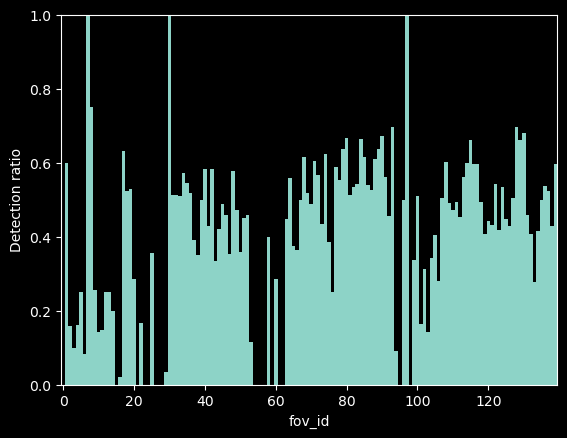

In [47]:
%matplotlib inline
fov_detection_df = pd.DataFrame.from_dict(fov_2_info, orient='index')
fov_detection_df['fov_id'] = fov_2_info.keys()
fov_detection_df['ratio'] = fov_detection_df['num_positive'] / fov_detection_df['num_total']
fov_detection_df = fov_detection_df.set_index('fov_id')

kept_fov_ratios = fov_detection_df['ratio']
plt.figure()
plt.bar(x=kept_fov_ratios.index, height=kept_fov_ratios, width=1)
plt.xlabel('fov_id')
plt.ylabel('Detection ratio')
plt.xlim([0-0.5, len(fov_detection_df)-0.5])
plt.ylim([0,1])
plt.title(os.path.basename(data_folder.strip(r'/')))
plt.show()

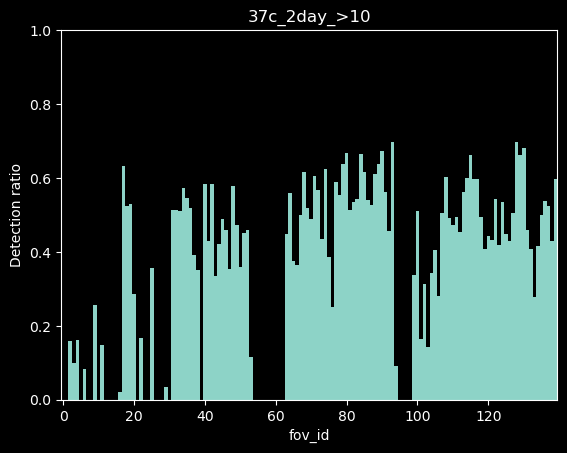

In [50]:
%matplotlib inline
fov_detection_df = pd.DataFrame.from_dict(fov_2_info, orient='index')
fov_detection_df['fov_id'] = fov_2_info.keys()
fov_detection_df['ratio'] = fov_detection_df['num_positive'] / fov_detection_df['num_total']
fov_detection_df = fov_detection_df.set_index('fov_id')

kept_fov_ratios = fov_detection_df['ratio'][fov_detection_df['num_total'] > 10]
plt.figure()
plt.bar(x=kept_fov_ratios.index, height=kept_fov_ratios, width=1)
plt.xlabel('fov_id')
plt.ylabel('Detection ratio')
plt.xlim([0-0.5, len(fov_detection_df)-0.5])
plt.ylim([0,1])
plt.title(os.path.basename(data_folder.strip(r'/'))+'_>10')
plt.show()

In [59]:

_fov_filename = os.path.join(folders[0], fovs[10])
_save_filename = _fov_filename.replace('.dax', '.hdf5')

with h5py.File(_save_filename, 'r') as _f:
    _spots_748 = Spots3D(_f['H0M1/748/spots'][:], pixel_size=[500,107,107])
    _spots_637 = Spots3D(_f['H0M1/637/spots'][:], pixel_size=[500,107,107])
    _im_748 = _f['H0M1/748/im'][:]
    _im_637 = _f['H0M1/637/im'][:]
    _dapi_im = _f['H0M1/405/im'][:]
    _dna_mask = _f['dapi_mask'][:]

<IPython.core.display.Javascript object>


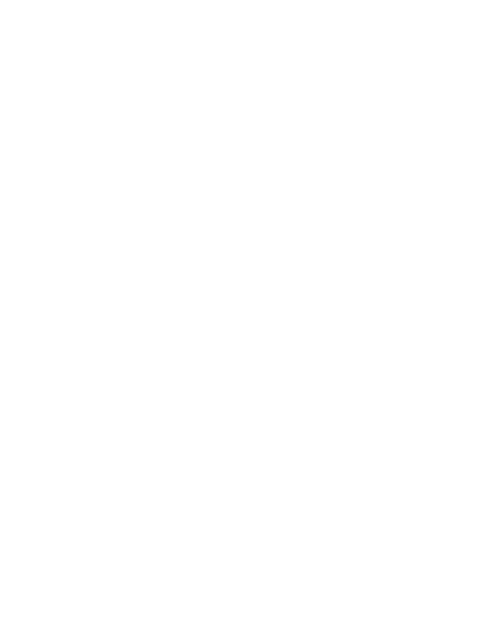

In [60]:
%matplotlib notebook
interactive.imshow_mark_3d([_im_748, _im_637, _dapi_im, _dna_mask])

<IPython.core.display.Javascript object>


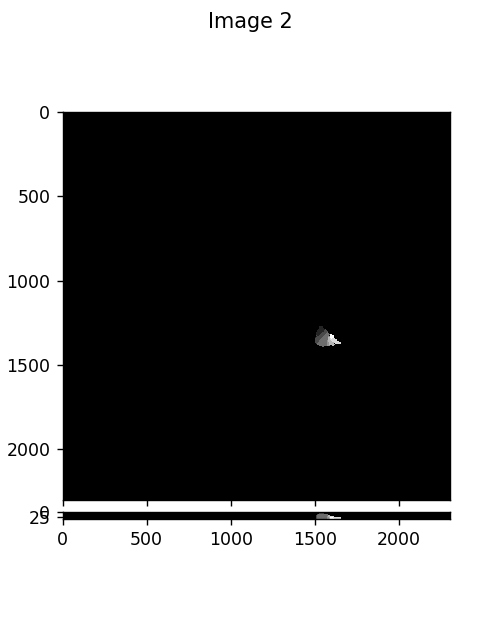

In [62]:
%matplotlib notebook
interactive.imshow_mark_3d([_dapi_im, _dna_mask])

<IPython.core.display.Javascript object>


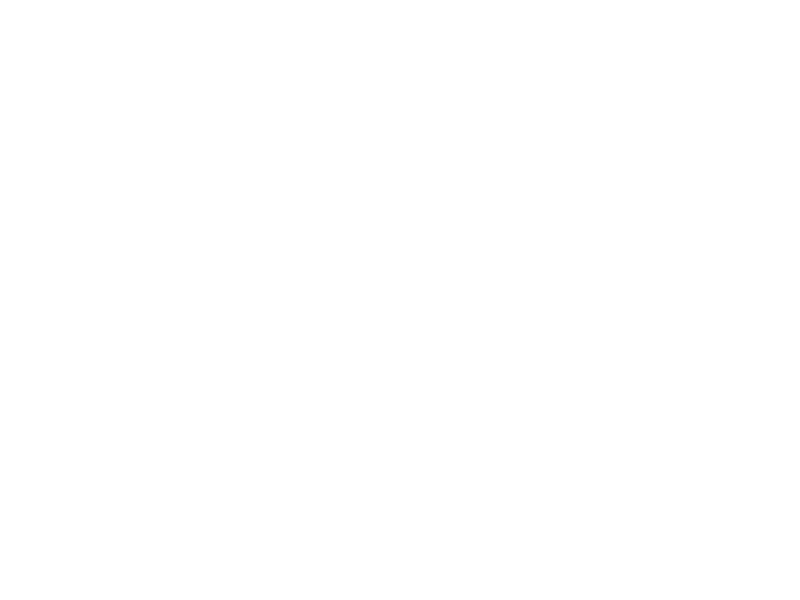

In [35]:
%matplotlib notebook
kept_spots_748, kept_spots_637 = colocalize_spots(_spots_748, _spots_637, threshold=300)
plt.figure()
plt.scatter(kept_spots_748.to_coords()[:,1], kept_spots_748.to_coords()[:,2])
plt.scatter(kept_spots_637.to_coords()[:,1], kept_spots_637.to_coords()[:,2])
plt.show()